In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [2]:
power_data = pd.read_csv('./한국서부발전(주)_태양광 발전 현황_20200927 (1).csv', encoding='euc-kr')
power_data.head(1)

,일자,발전기명,01시,02시,03시,04시,05시,06시,07시,08시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2017-01-01,영암에프원태양광b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7344000.0,5155200.0,2131200.0,134400.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
power_data_영암 = power_data[power_data['발전기명']=='영암에프원태양광b']
power_data_세종 = power_data[power_data['발전기명']=='세종시폐기물매립장태양광']
power_data_안산 = power_data[power_data['발전기명']=='안산연성정수장태양광']

In [4]:
power_time = list(power_data_영암.columns)[2:]
change_power_data_영암 = []
for i in range(power_data_영암.shape[0]):
    target=[]
    for j in range(26):
        if j ==0:
            date = power_data_영암.iloc[i,j]
        elif (j!=0) & (j!=1):
            target.append([date+" "+power_time[j-2],power_data_영암.iloc[i,j]])
    change_power_data_영암.append(target)

In [5]:
change_power_data_영암_date = []
change_power_data_영암_generation = []
for i in change_power_data_영암:
    for j in i:
        change_power_data_영암_date.append(j[0])
        change_power_data_영암_generation.append(j[1])

In [6]:
total_power_generation = pd.DataFrame(data = change_power_data_영암_generation, index=change_power_data_영암_date, columns=['generation'])
total_power_generation_2017 = total_power_generation.iloc[:8760,:]
total_power_generation_2018 = total_power_generation.iloc[8760:17520,:]
total_power_generation_2019= total_power_generation.iloc[17520:26280,:]
total_power_generation_2020 = total_power_generation.iloc[26280:,:]

In [7]:
target_datetime_generation=[]
for i,j in zip(change_power_data_영암_date, change_power_data_영암_generation):
    date_time= i.split(" ")
    if (date_time[1] =='09시') | (date_time[1] =='13시') | (date_time[1] =='17시'):
        target_datetime_generation.append([i,j])

In [8]:
target_datetime_power_generation_영암 = pd.DataFrame(data=target_datetime_generation, columns=['date_time','generation'] )
target_datetime_power_generation_영암

,date_time,generation
0,2017-01-01 09시,547200.0
1,2017-01-01 13시,8697600.0
2,2017-01-01 17시,2131200.0
3,2017-01-02 09시,345600.0
4,2017-01-02 13시,8332800.0
...,...,...
3826,2020-06-29 13시,1824000.0
3827,2020-06-29 17시,1286400.0
3828,2020-06-30 09시,998400.0
3829,2020-06-30 13시,5126400.0


In [9]:
target_datetime_power_generation_영암_2017 = target_datetime_power_generation_영암.iloc[:1095,:]
target_datetime_power_generation_영암_2018 = target_datetime_power_generation_영암.iloc[1095:2190,:]
target_datetime_power_generation_영암_2019 = target_datetime_power_generation_영암.iloc[2190:3285,:]
target_datetime_power_generation_영암_2020 = target_datetime_power_generation_영암.iloc[3285:,:]
target_datetime_power_generation_영암_2017

,date_time,generation
0,2017-01-01 09시,547200.0
1,2017-01-01 13시,8697600.0
2,2017-01-01 17시,2131200.0
3,2017-01-02 09시,345600.0
4,2017-01-02 13시,8332800.0
...,...,...
1090,2017-12-30 13시,1756800.0
1091,2017-12-30 17시,230400.0
1092,2017-12-31 09시,1142400.0
1093,2017-12-31 13시,6278400.0


### 기상 변수에 대한 설명
#####  일조(hr)	: 태양광선이 구름이나 안개등에 의해서 차단되지 않고 지표면을 비춘시간, 시의 단위로써 표시하며 10분위까지의 값으로 표현
##### 일사(MJ/m2)(일사량) : 일사의 세기로 태양으로부터 지구로 복사되는 에너지를 일사라 한다. 일사량의 측정은 태양광선의 진행방향에 직각인 1cm2의 넓이에 1분 동안 복사된 양으로 측정한다.
##### 전운량(10분위) : 전운량은 운량과 같은뜻으로 하늘을 덮고 있는 구름의 양의 비율, 하늘 전체(눈에 보이는 범위)의 몇 %쯤이 구름으로 덮여 있는지에 따라 0부터 10까지의 계급으로 나눈다
##### 풍향(16방위) : 풍향은 바람이 불어오는 방향으로 나타내며 보통 16방위를 사용, 16방위는 360도의 원판을 22.5도 간격으로 16등분

In [10]:
wea_2017 = pd.read_csv('./서부발전_2017.csv', encoding='euc-kr')
wea_2018 = pd.read_csv('./서부발전_2018.csv', encoding='euc-kr')
wea_2019 = pd.read_csv('./서부발전_2019.csv', encoding='euc-kr')
wea_2020 = pd.read_csv('./서부발전_2020.csv', encoding='euc-kr')

In [11]:
wea_2017_영암= wea_2017[wea_2017['지점명']=='목포'].iloc[:,2:]
wea_2017_영암

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),일조(hr),일사(MJ/m2),전운량(10분위),운형(운형약어),지면온도(°C)
17518,2017-01-01 01:00,5.0,NaN,1.8,160,93,NaN,NaN,NaN,NaN,3.2
17519,2017-01-01 02:00,4.1,NaN,0.8,140,93,NaN,NaN,NaN,NaN,2.2
17520,2017-01-01 03:00,3.3,NaN,1.5,160,94,NaN,NaN,0.0,NaN,1.7
17521,2017-01-01 04:00,2.5,NaN,1.8,160,95,NaN,NaN,0.0,NaN,1.2
17522,2017-01-01 05:00,2.1,NaN,1.8,160,97,NaN,NaN,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
26272,2017-12-31 19:00,3.4,NaN,3.0,340,86,NaN,NaN,NaN,NaN,3.1
26273,2017-12-31 20:00,3.0,NaN,3.0,360,88,NaN,NaN,NaN,NaN,3.4
26274,2017-12-31 21:00,2.5,NaN,1.8,50,91,NaN,NaN,7.0,Sc,2.3
26275,2017-12-31 22:00,2.0,NaN,0.8,360,77,NaN,NaN,NaN,NaN,2.8


In [12]:
target_datetime_weather_영암_2017=[]
cnt=1
for i in wea_2017_영암['일시']:
    date_time= i.split(" ")
    if (date_time[1] =='09:00') | (date_time[1] =='13:00') | (date_time[1] =='17:00'):
        data= list(wea_2017_영암.iloc[cnt,1:])
        target_datetime_weather_영암_2017.append(data)
    cnt+=1

In [13]:
# target_datetime_weather_영암_2017 : 2017 년도 영암발전소의 일별 (09:00~09:59), (13:00~13:59), (15:00~15:59) 의 기상
# target_datetime_power_generation_영암_2017['generation'] : 2017 년도 영암발전소의 일별 (09:00~09:59), (13:00~13:59), (15:00~15:59) 의 발전량

In [14]:
# conbined : 2017 년도 영암발전소의 일별 (09:00~09:59), (13:00~13:59), (15:00~15:59) 의 기상데이터와 발전량 데이터
conbined =[]
for i, j in zip(target_datetime_weather_영암_2017, list(target_datetime_power_generation_영암_2017['generation'])):
    i.append(j)
    conbined.append(i)

In [15]:
wea_2017_영암.columns

Index(['일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '일조(hr)',
       '일사(MJ/m2)', '전운량(10분위)', '운형(운형약어)', '지면온도(°C)'],
      dtype='object')

In [18]:
power_weather_2017_영암 = pd.DataFrame(data=conbined, index=target_datetime_power_generation_영암_2017['date_time'], columns=['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '일조(hr)',
       '일사(MJ/m2)', '전운량(10분위)', '운형(운형약어)', '지면온도(°C)', '발전량'])
power_weather_2017_영암


,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),일조(hr),일사(MJ/m2),전운량(10분위),운형(운형약어),지면온도(°C),발전량
date_time,,,,,,,,,,,
2017-01-01 09시,4.4,NaN,1.8,160,90,0.2,0.47,6.0,Sc,8.4,547200.0
2017-01-01 13시,10.2,NaN,1.5,290,66,1.0,1.46,0.0,NaN,12.1,8697600.0
2017-01-01 17시,8.5,NaN,0.9,20,77,0.2,0.04,0.0,NaN,4.9,2131200.0
2017-01-02 09시,7.7,NaN,0.4,0,77,0.9,0.62,3.0,Ci,10.5,345600.0
2017-01-02 13시,12.3,NaN,2.4,290,67,1.0,1.43,0.0,NaN,14.1,8332800.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 13시,7.0,NaN,2.0,160,72,0.0,0.50,10.0,As,8.5,1756800.0
2017-12-30 17시,6.5,NaN,1.1,160,80,0.0,0.01,10.0,ScAs,5.7,230400.0
2017-12-31 09시,4.5,NaN,4.0,340,80,0.6,0.62,6.0,Sc,4.6,1142400.0


Text(0.5, 1.0, '2017 Weather : temperature')

C:\Users\wjdal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wjdal\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


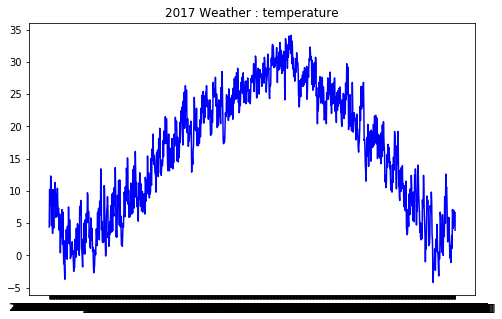

In [20]:
# 기온
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(power_weather_2017_영암.index, power_weather_2017_영암['기온(°C)'], color='b')
ax.set_title('2017 Weather : temperature')

Text(0.5, 1.0, '2017 Weather : Solar Radiation')

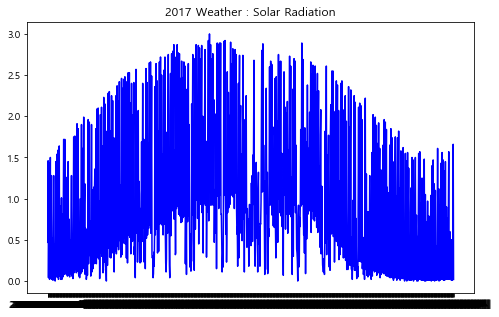

In [24]:
# 일사
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(power_weather_2017_영암.index, power_weather_2017_영암['일사(MJ/m2)'], color='b')
ax.set_title('2017 Weather : Solar Radiation')

Text(0.5, 1.0, '2017 Weather : Clouds')

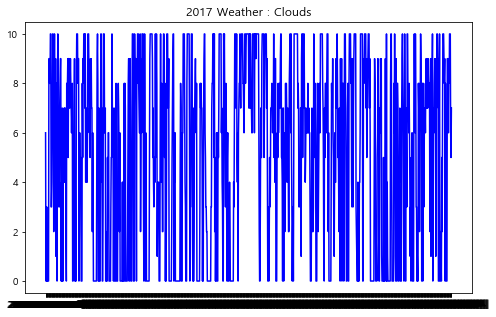

In [25]:
# 전운량
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(power_weather_2017_영암.index, power_weather_2017_영암['전운량(10분위)'], color='b')
ax.set_title('2017 Weather : Clouds')

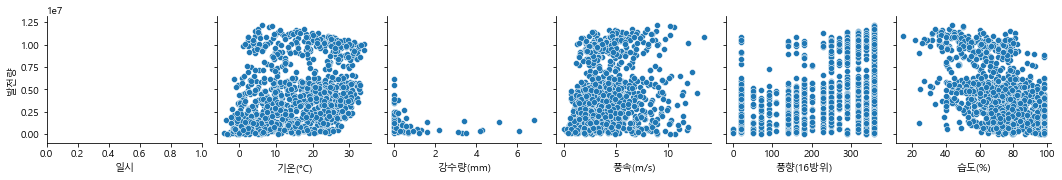

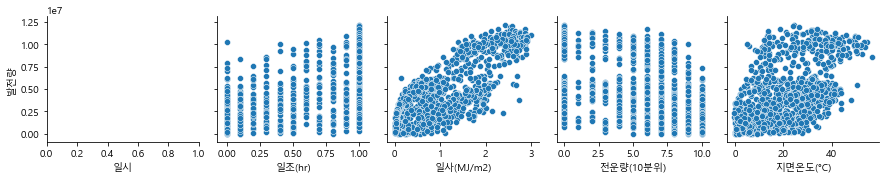

In [27]:
sns.pairplot(power_weather_2017_영암, x_vars=['일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)'],y_vars=['발전량'])

sns.pairplot(power_weather_2017_영암, x_vars=['일시', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '지면온도(°C)'] ,y_vars=['발전량'])


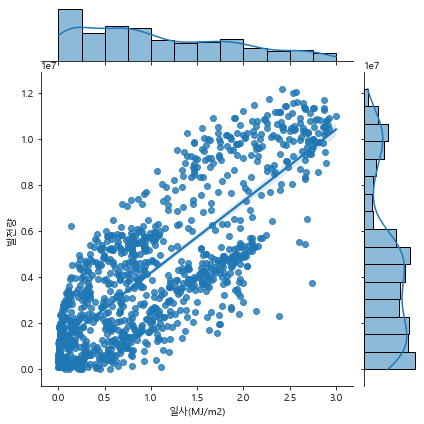

In [30]:
# 태양광 발전과 일사량사이의 상관관계
sns.jointplot(x='일사(MJ/m2)', y='발전량', data=power_weather_2017_영암, kind='reg')

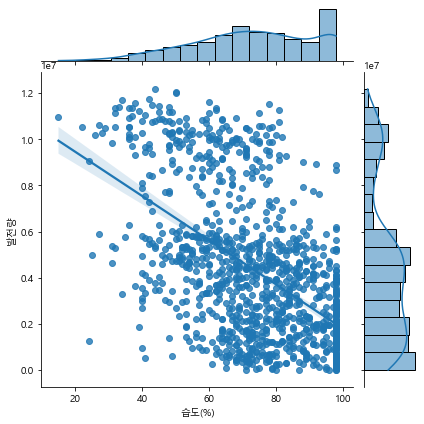

In [31]:
# 태양광 발전과 습도사이의 상관관계
sns.jointplot(x='습도(%)', y='발전량', data=power_weather_2017_영암, kind='reg')